<a href="https://colab.research.google.com/github/amd257/COVID-detection-using-CNNs/blob/FinalRound/SeqModel2_ThreeLabel_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Compressed Three Label Classification Dataset file is stored at: https://www.dropbox.com/s/n17olwvllwbnyl6/threelabeldataset.zip?dl=0
!wget https://www.dropbox.com/s/n17olwvllwbnyl6/threelabeldataset.zip?dl=0

--2021-03-06 14:12:47--  https://www.dropbox.com/s/n17olwvllwbnyl6/threelabeldataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/n17olwvllwbnyl6/threelabeldataset.zip [following]
--2021-03-06 14:12:47--  https://www.dropbox.com/s/raw/n17olwvllwbnyl6/threelabeldataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1224559ad50c92faa1ca5bb3d8.dl.dropboxusercontent.com/cd/0/inline/BKI75qmW3_93-oxuE8Ptga274yQ6S5iBwdoBrI0NmU_KSR41C2G1wz_RXu1-Ca8R1_OkUgQ9q8iB6Jj7tZICBpUa_-u7o5WWQG9DQcFw5XgEhdtl2vMQX9LYi8L55lAEAiKyiCKWegfbsn1gbunXkD0f/file# [following]
--2021-03-06 14:12:47--  https://uc1224559ad50c92faa1ca5bb3d8.dl.dropboxusercontent.com/cd/0/inline/BKI75qmW3_93-oxuE8Ptga274yQ6S5iBwdoBrI0NmU_KSR41C2G1wz_

In [ ]:
!unzip /content/threelabeldataset.zip?dl=0   #Extracting the compressed dataset file

In [20]:
#Importing all the libraries required for preprocessing, training and evaluation of the model
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory #Importing Functions for image preprocessing from keras
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau #Importing Functions for early stopping and learning rate reduction
from sklearn.utils import class_weight #Importing functions for computing class weights from scikit learn class_weight module
from keras.utils import plot_model
from keras.preprocessing import image
from keras.layers import *
from keras.models import * #Importing the functions required for creating the model
import matplotlib.pyplot as plt #For plotting the training and validation loss and accuracy graphs
import numpy as np
import pandas as pd


In [21]:
train_images_path = "ThreeLabelDataset/Train"
validation_images_path = "ThreeLabelDataset/Validation"
test_images_path = "ThreeLabelDataset/Test"
image_height = 256
image_width = 256

In [22]:
#Training data augmentation before feeding it to the CNN model
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,  #flipping will add more variations to the data and it will help fight overfitting as welll
    )

#Preprocessing the training dataset
train_dataset= train_datagen.flow_from_directory(
    train_images_path,
    target_size = (image_height,image_width), 
    batch_size = 32,
    color_mode="grayscale",
    class_mode = "categorical",
    shuffle = True,
    seed =40
    )

inp_shape= train_dataset.image_shape
print("Input Shape: " , inp_shape)
print("Class Labels: ", train_dataset.class_indices)

Found 3108 images belonging to 3 classes.
Input Shape:  (256, 256, 1)
Class Labels:  {'COVID': 0, 'Normal': 1, 'ViralPneumonia': 2}


In [23]:
validation_datagen = image.ImageDataGenerator(rescale = 1./255) #Rescaling the validation images 

#Preprocessing the validation dataset
validation_dataset = validation_datagen.flow_from_directory(
    validation_images_path,
    target_size = (image_height,image_width),
    batch_size = 32,
    color_mode = "grayscale" ,
    class_mode = "categorical",
    shuffle = True,
    seed =40
    )

inp_shape= validation_dataset.image_shape
print("Input Shape: " , inp_shape)
print("Class Labels: ", validation_dataset.class_indices)

Found 388 images belonging to 3 classes.
Input Shape:  (256, 256, 1)
Class Labels:  {'COVID': 0, 'Normal': 1, 'ViralPneumonia': 2}


In [24]:
test_datagen = image.ImageDataGenerator(rescale = 1./255) #Rescaling the test images 

#Preprocessing the testing dataset
test_dataset = test_datagen.flow_from_directory(
    test_images_path,
    target_size = (image_height,image_width),
    batch_size = 32,
    color_mode = "grayscale" ,
    class_mode = "categorical",
    shuffle = True,
    seed =40
    )

inp_shape= test_dataset.image_shape
print("Input Shape: " , inp_shape)
print("Class Labels: ", test_dataset.class_indices)

Found 312 images belonging to 3 classes.
Input Shape:  (256, 256, 1)
Class Labels:  {'COVID': 0, 'Normal': 1, 'ViralPneumonia': 2}


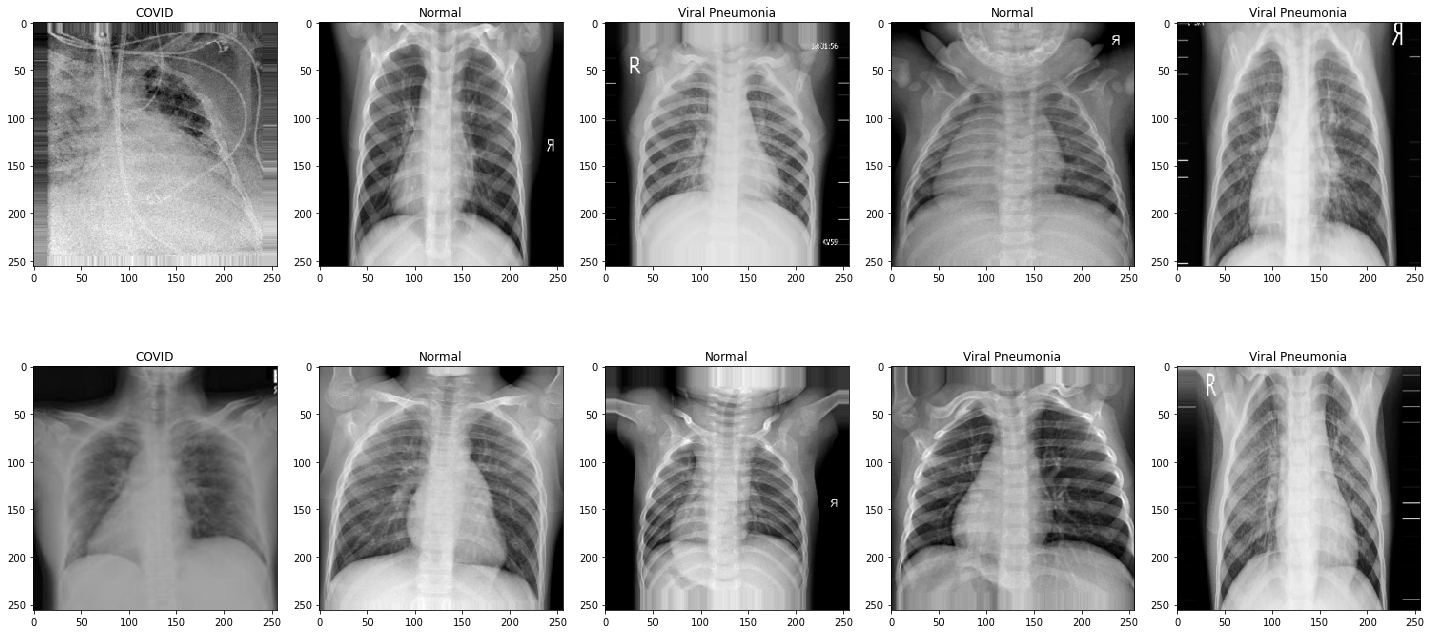

In [25]:
#Visualization of Preprocessed Data
plt.figure(figsize=(20, 10))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train_dataset:
        image = X_batch[0]        
        dic = {0: 'COVID', 1:'Normal', 2:'Viral Pneumonia'}
        img_index = np.argmax(Y_batch) #to get index of the image label 
        plt.title(label= dic.get(img_index))
        plt.axis('on')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [26]:
# Sequential Model with 6 convolutional layers

seqmodel2 = Sequential()

seqmodel2.add(Conv2D(32, 
                     (3, 3), 
                     activation="relu", 
                     input_shape= inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))

seqmodel2.add(Conv2D(32, 
                     (3, 3), 
                     activation="relu", 
                     input_shape= inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))
seqmodel2.add(Dropout(0.25))

seqmodel2.add(Conv2D(32, 
                     (3, 3), 
                     activation="relu", 
                     input_shape= inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))
seqmodel2.add(Dropout(0.25))

seqmodel2.add(Conv2D(64, 
                     (3, 3), 
                     activation="relu", 
                     input_shape=inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))
seqmodel2.add(Dropout(0.25))

seqmodel2.add(Conv2D(64, 
                     (3, 3), 
                     activation="relu", 
                     input_shape=inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))
seqmodel2.add(Dropout(0.25))


seqmodel2.add(Conv2D(64, 
                     (3, 3), 
                     activation="relu", 
                     input_shape=inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))
seqmodel2.add(Dropout(0.25))

seqmodel2.add(Flatten())

seqmodel2.add(Dense(128, activation = 'relu'))

seqmodel2.add(Dense(64, activation = 'relu'))

seqmodel2.add(Dense(3, activation = 'softmax')) # activation function is softmax since this is multi-class problem


seqmodel2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
seqmodel2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 32)       

(None, 256, 256, 1)


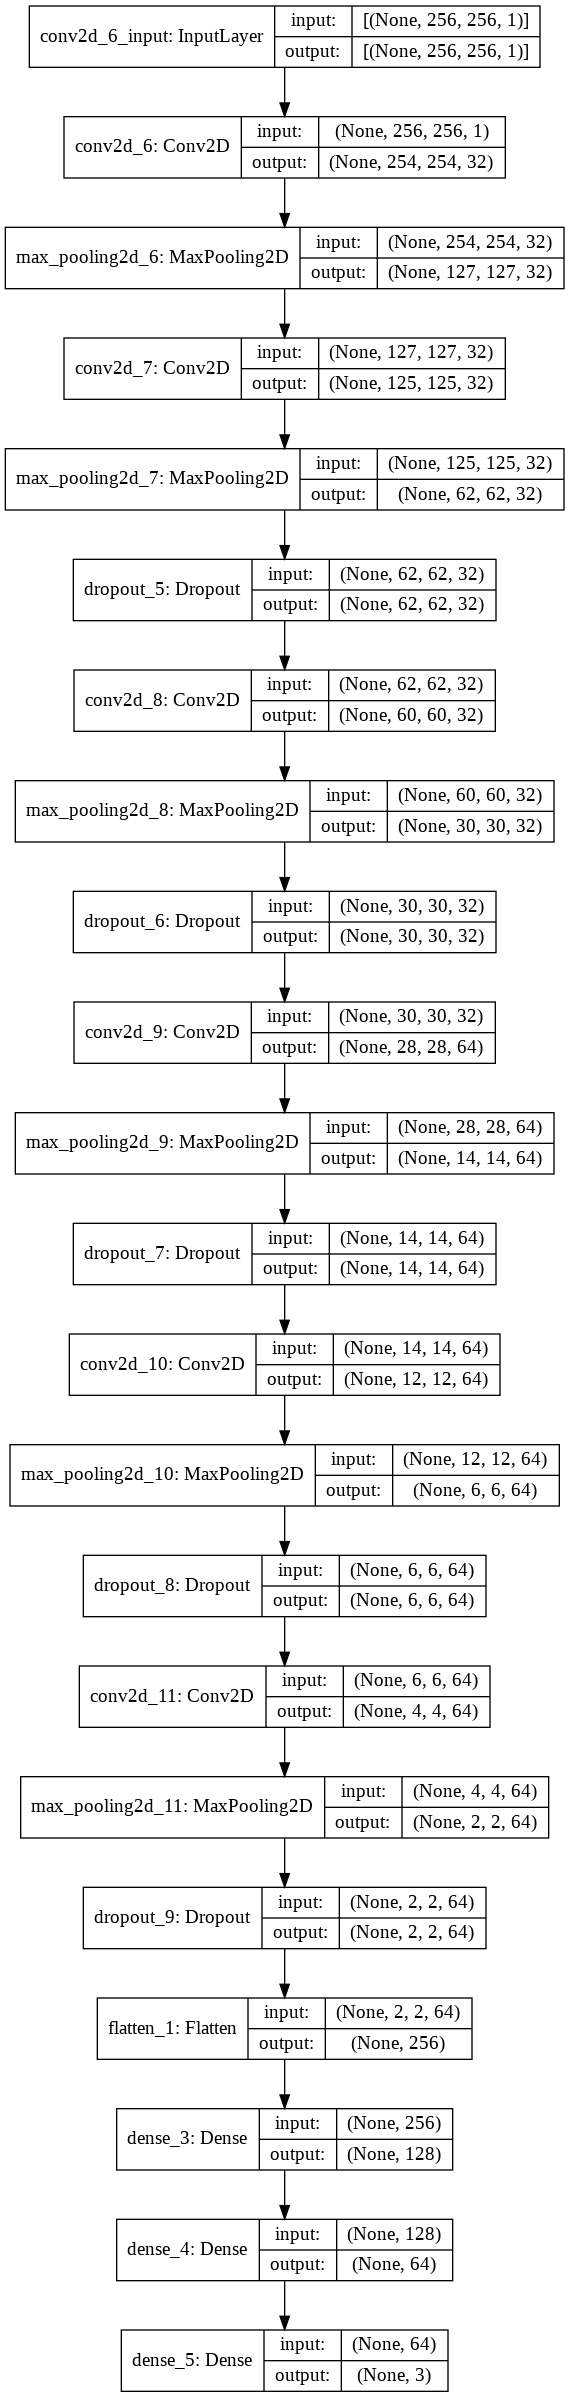

In [27]:
print(seqmodel2.input.shape)
plot_model(seqmodel2,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [28]:
STEP_SIZE_TRAIN=train_dataset.n//train_dataset.batch_size
STEP_SIZE_VALID=validation_dataset.n//validation_dataset.batch_size
print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)

97
12


In [29]:
#Defining functions for early stopping and adjusting the learning rate during model training 
earlyStop = EarlyStopping(monitor="val_loss", mode="min", patience=4, verbose= 1)
learningRateReduce = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.4, min_lr=0.0000001)
callbacksList = [ earlyStop, learningRateReduce]

In [30]:
#Assigning class weights using the compute class weights function
classWeights = class_weight.compute_class_weight('balanced', np.unique(train_dataset.classes), train_dataset.classes)
classWeightsDict = dict(enumerate(classWeights))
print("The class weights to be assigned to each label are:", classWeightsDict)

The class weights to be assigned to each label are: {0: 1.0791666666666666, 1: 0.9664179104477612, 2: 0.9628252788104089}


In [31]:
history = seqmodel2.fit(
    train_dataset, 
    steps_per_epoch = STEP_SIZE_TRAIN, 
    epochs=100,
    validation_data = validation_dataset,
    validation_steps = STEP_SIZE_VALID,
    class_weight = classWeightsDict,
    callbacks=callbacksList
    )

Epoch 1/100
97/97 [==============================] - 88s 599ms/step - loss: 1.0765 - accuracy: 0.3703 - val_loss: 0.6454 - val_accuracy: 0.6875
Epoch 2/100
97/97 [==============================] - 58s 602ms/step - loss: 0.6405 - accuracy: 0.7152 - val_loss: 0.5333 - val_accuracy: 0.7943
Epoch 3/100
97/97 [==============================] - 58s 600ms/step - loss: 0.5346 - accuracy: 0.7658 - val_loss: 0.4754 - val_accuracy: 0.8568
Epoch 4/100
97/97 [==============================] - 58s 601ms/step - loss: 0.4185 - accuracy: 0.8351 - val_loss: 0.3480 - val_accuracy: 0.8802
Epoch 5/100
97/97 [==============================] - 58s 601ms/step - loss: 0.3703 - accuracy: 0.8489 - val_loss: 0.3210 - val_accuracy: 0.8802
Epoch 6/100
97/97 [==============================] - 58s 603ms/step - loss: 0.3842 - accuracy: 0.8631 - val_loss: 0.3079 - val_accuracy: 0.8828
Epoch 7/100
97/97 [==============================] - 58s 601ms/step - loss: 0.3434 - accuracy: 0.8788 - val_loss: 0.3304 - val_accuracy:

In [32]:
seqmodel2.save('SeqModel2_ThreeLabelFinal.h5') #Saving the model

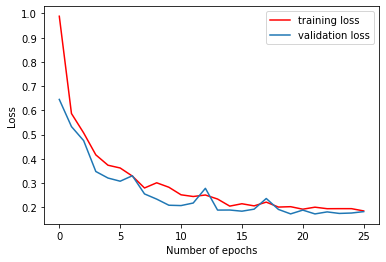

In [40]:
#Plotting the graph for training and validation loss

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

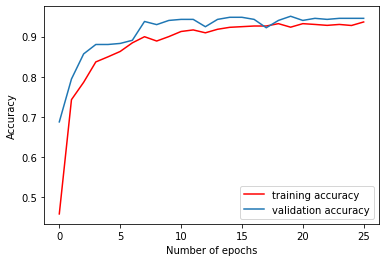

In [41]:
#Plotting the graph for training and validation accuracy
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
testingAccuracy = seqmodel2.evaluate(test_dataset) #Evaluating the model on the testing dataset
print("The Sequential Model 2.0 has a testing accuracy of:", testingAccuracy[1]*100, "%")

10/10 [==============================] - 4s 388ms/step - loss: 0.1975 - accuracy: 0.9391
The Sequential Model 2.0 has a testing accuracy of: 93.91025900840759 %
